In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d colabheroes/iubmcdb

 97% 83.0M/85.9M [00:01<00:00, 90.6MB/s]
100% 85.9M/85.9M [00:01<00:00, 82.9MB/s]


In [ ]:
!unzip -qq '/content/iubmcdb.zip'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set the batch size and image size
batch_size = 32
image_size = (28,28)

# Assuming 'compounds' is your main folder
main_folder = '/content/IUBMCdb'

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    main_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

# Modify input_shape based on your image size and number of channels
input_shape = (image_size[0], image_size[1], 1)  # Change '1' to '3' for color images


Found 7909 images belonging to 13 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()

# First block of layers
model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second block of layers
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third block of layers
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(13))
model.add(Activation('softmax'))


    # Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       36992     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       1

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

path_model = '/content/drive/IUBMCdb.h5'

# Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    callbacks=[ModelCheckpoint(filepath=path_model)]
)

Epoch 1/30


<ipython-input-7-04f7c795faaa>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


247/247 [==============================] - 12s 17ms/step - loss: 1.7747 - accuracy: 0.4169
Epoch 2/30
  1/247 [..............................] - ETA: 10s - loss: 1.0358 - accuracy: 0.5938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


247/247 [==============================] - 5s 20ms/step - loss: 0.5590 - accuracy: 0.8205
Epoch 3/30
247/247 [==============================] - 4s 15ms/step - loss: 0.3675 - accuracy: 0.8857
Epoch 4/30
247/247 [==============================] - 4s 16ms/step - loss: 0.2514 - accuracy: 0.9212
Epoch 5/30
247/247 [==============================] - 5s 19ms/step - loss: 0.2025 - accuracy: 0.9387
Epoch 6/30
247/247 [==============================] - 4s 16ms/step - loss: 0.1517 - accuracy: 0.9509
Epoch 7/30
247/247 [==============================] - 4s 15ms/step - loss: 0.1473 - accuracy: 0.9554
Epoch 8/30
247/247 [==============================] - 5s 20ms/step - loss: 0.1033 - accuracy: 0.9675
Epoch 9/30
247/247 [==============================] - 4s 15ms/step - loss: 0.1245 - accuracy: 0.9633
Epoch 10/30
247/247 [==============================] - 4s 16ms/step - loss: 0.0858 - accuracy: 0.9735
Epoch 11/30
247/247 [==============================] - 4s 17ms/step - loss: 0.1128 - accuracy: 0.9665

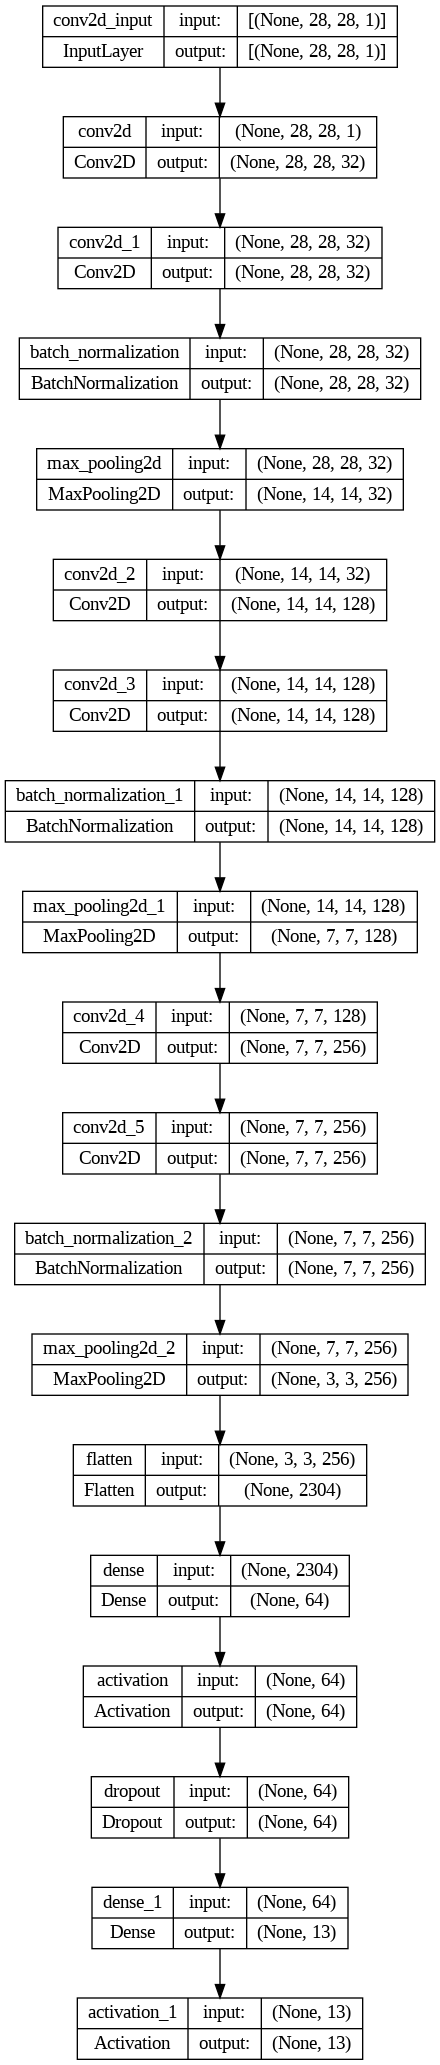

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

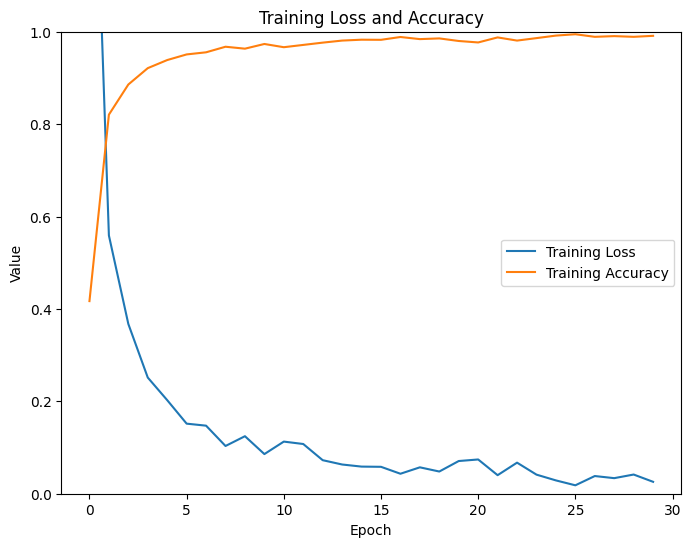

In [ ]:
# Adjusting the y-axis to start from 0.25 as requested

plt.figure(figsize=(8, 6))  # Reduced width from 12 to 8

# Plot training loss and training accuracy in the same graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Adding titles and labels
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')

# Adjusting y-axis range
plt.ylim(0, 1)  # Start y-axis from 0.25

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
model.save('/content/drive/IUBMCdb.keras')